## Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Here is a simple explanation of each variable:

1.Age: How old the person is.

2.Sex: Whether the person is a boy or a girl.

3.Chest Pain Type: Different types of chest pain a person can feel.

4.Resting Blood Pressure: The pressure of the blood in the person’s veins when they are resting.

6.Serum Cholesterol in mg/dl: The amount of fat in the person’s blood.

7.Fasting Blood Sugar > 120 mg/dl: If the person's blood sugar is high after not eating for a while.

8.Resting Electrocardiographic Results: How the heart's electrical activity looks when the person is not moving.

9.Maximum Heart Rate Achieved: The highest heart rate the person reaches during exercise.

10.Exercise Induced Angina: Chest pain that happens when the person is exercising.

11.Oldpeak: How much the ST segment in the heart's activity drops after exercise.

12.The Slope of the Peak Exercise ST Segment: The slope shape of the heart's ST segment after exercise.

13.Number of Major Vessels (0-3) Colored by Fluoroscopy: How many major blood vessels are seen using a special camera.

Thal: Whether the person's heart is normal, has a fixed defect, or a reversible defect.

14.Target: 0- if a person is healthy and 1 if the person has a heart disease






## uploading the csv file

In [2]:
df=pd.read_csv("/content/drive/MyDrive/heart_disease_data.csv")

df=pd.read_csv("/content/heart_disease_data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **explotory data analysis**

In [4]:
df.shape

(303, 14)

In [5]:
# this show our data has 303 rows and 14 columns

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


## **Finding correlation among the variables**

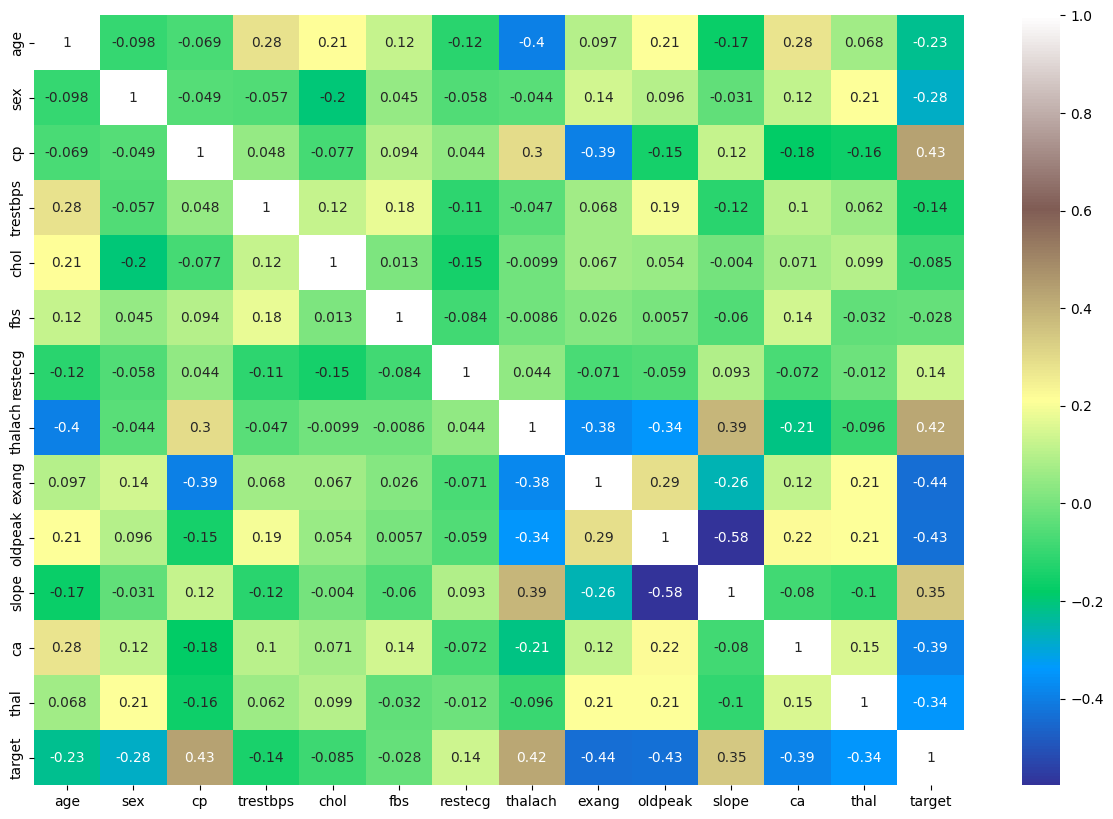

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="terrain")
plt.savefig('heatmap.png')
plt.show()

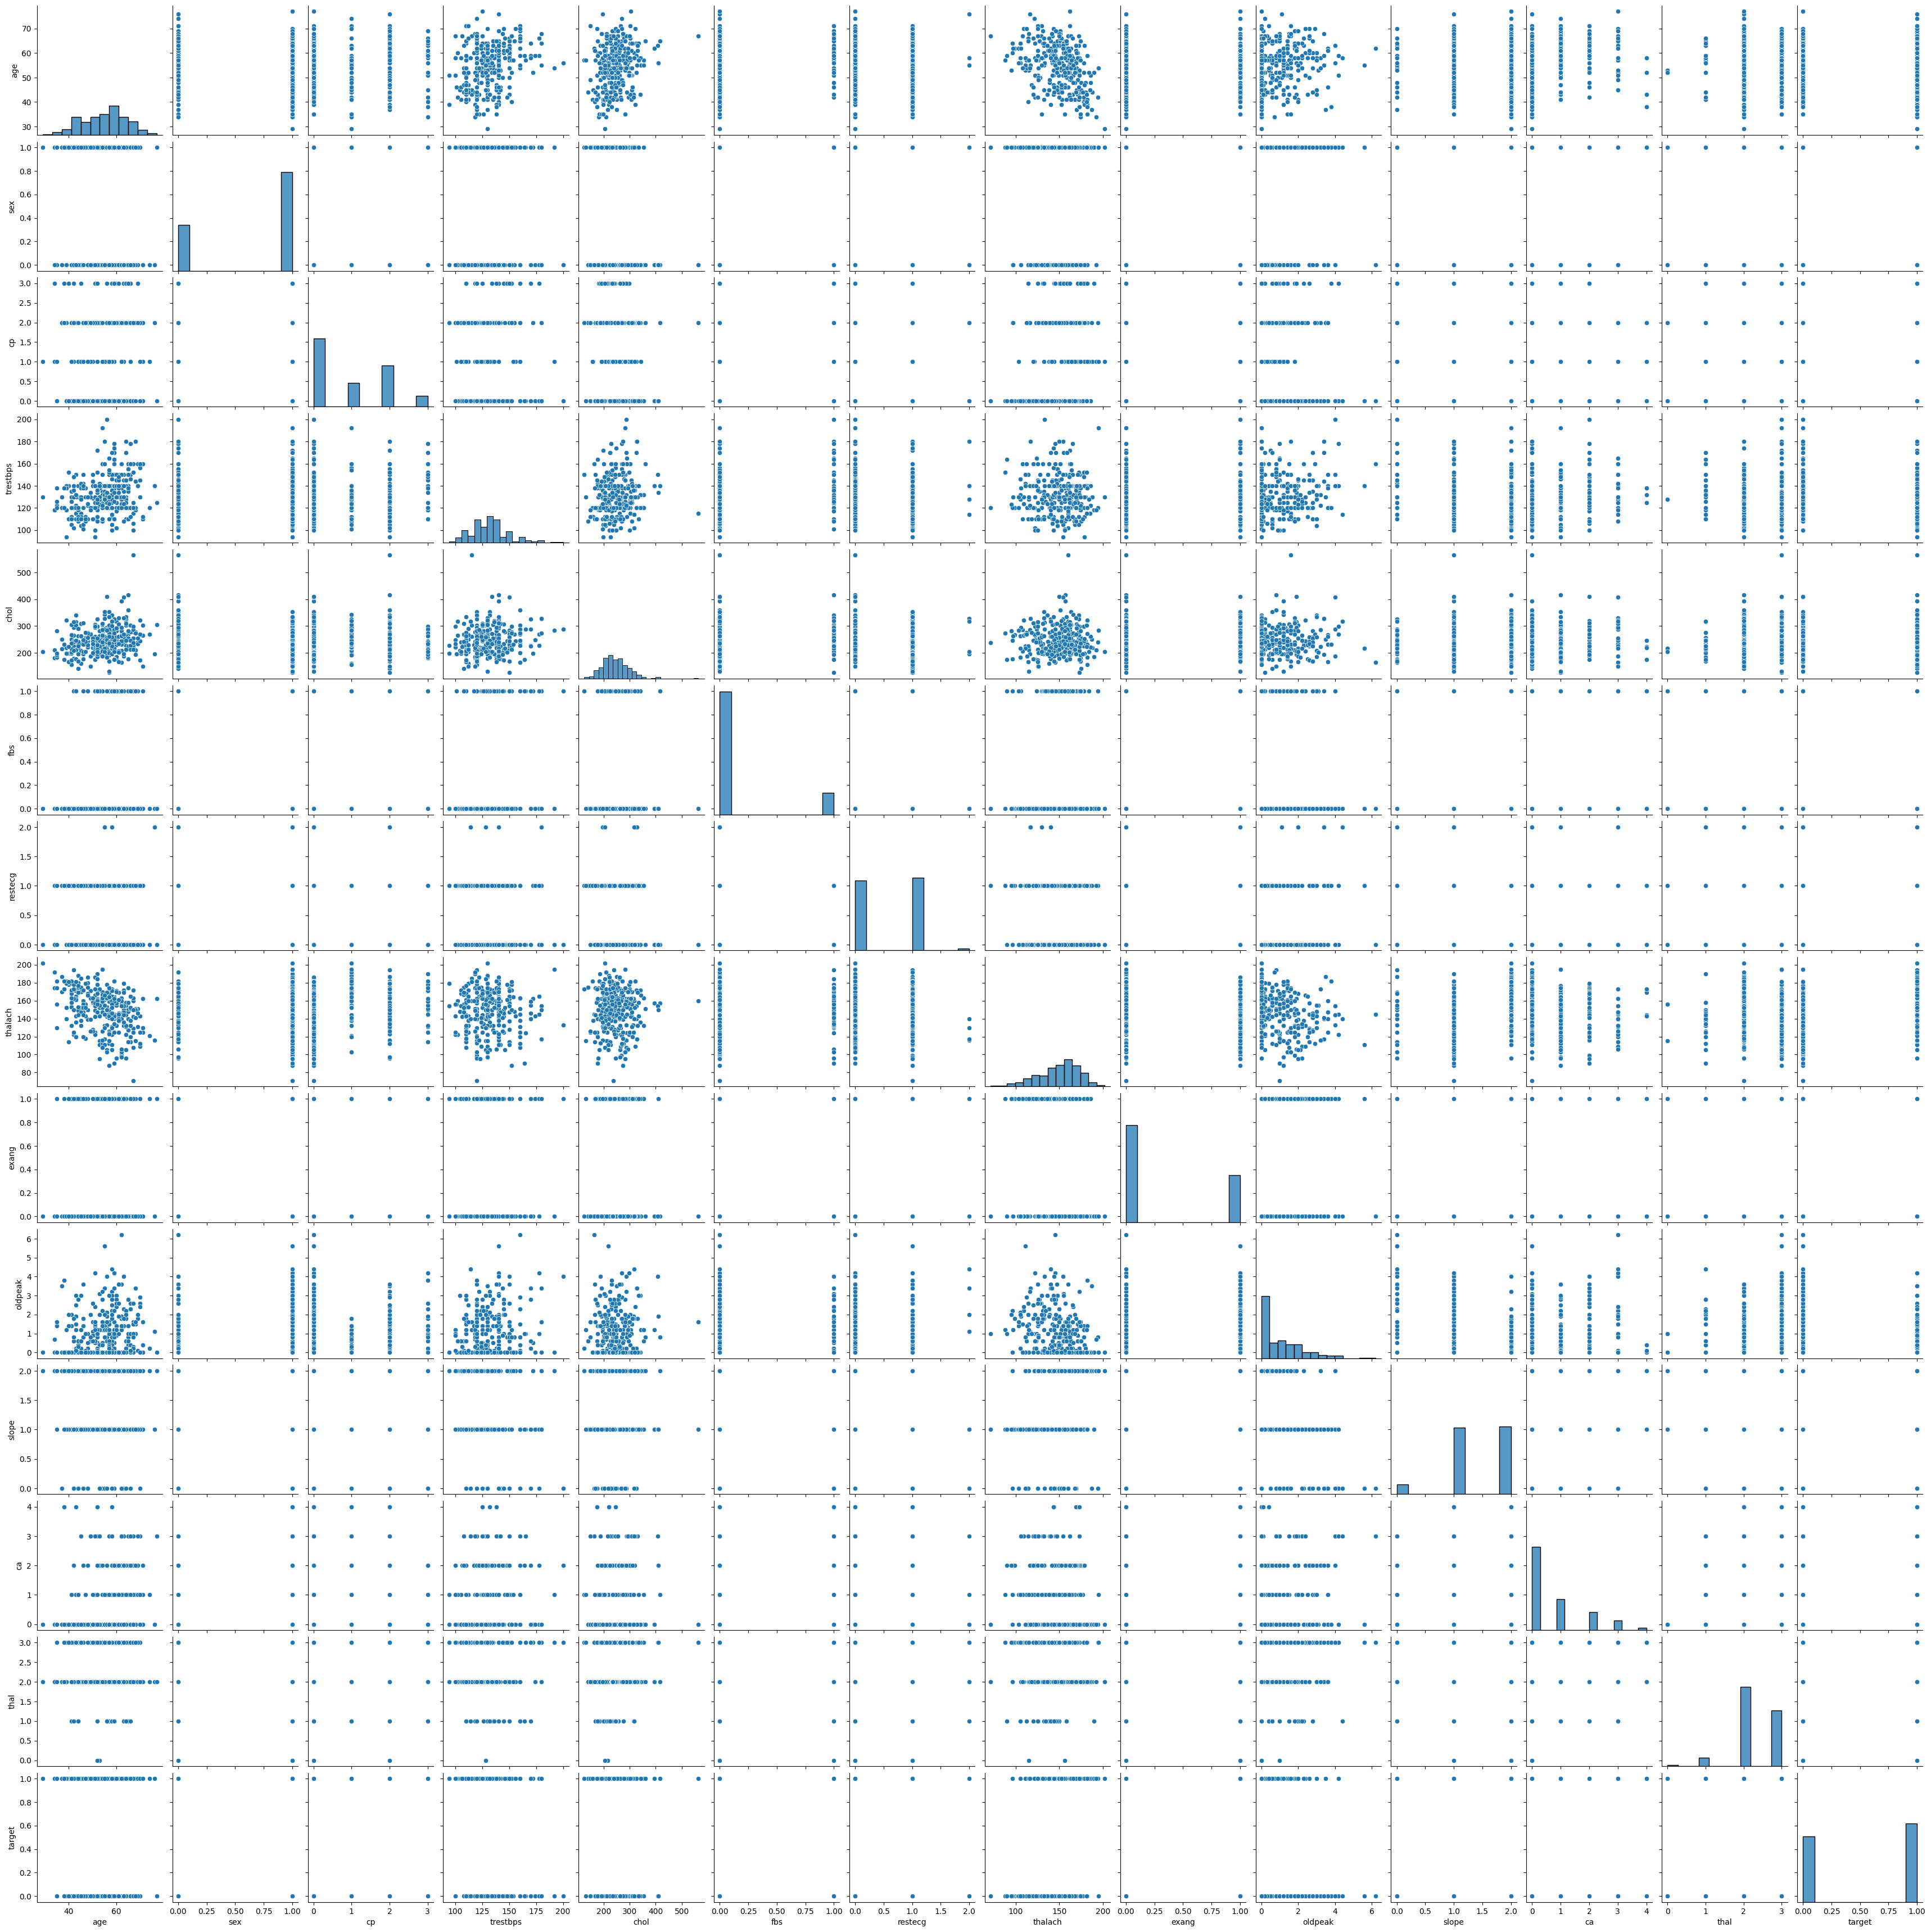

In [11]:
sns.pairplot(data=df)
plt.show()

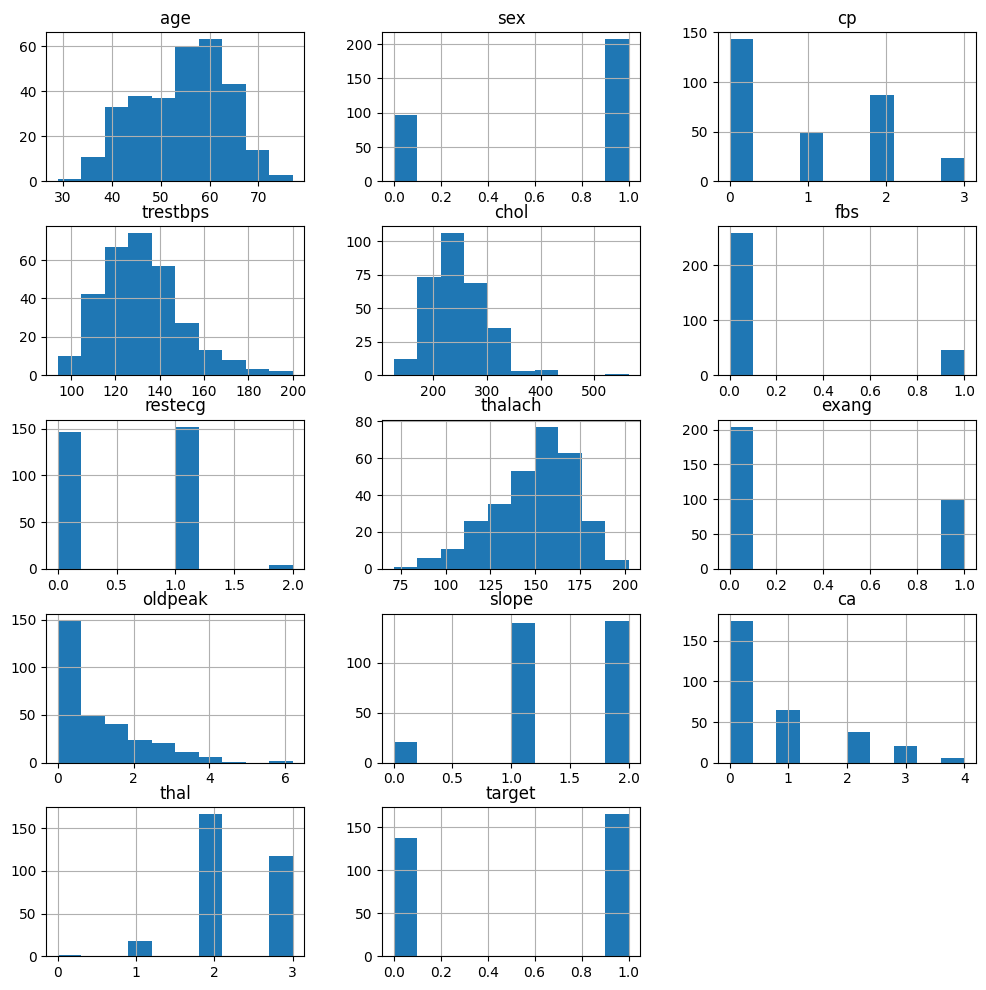

In [12]:
df.hist(figsize=(12,12), layout=(5,3));
plt.show()

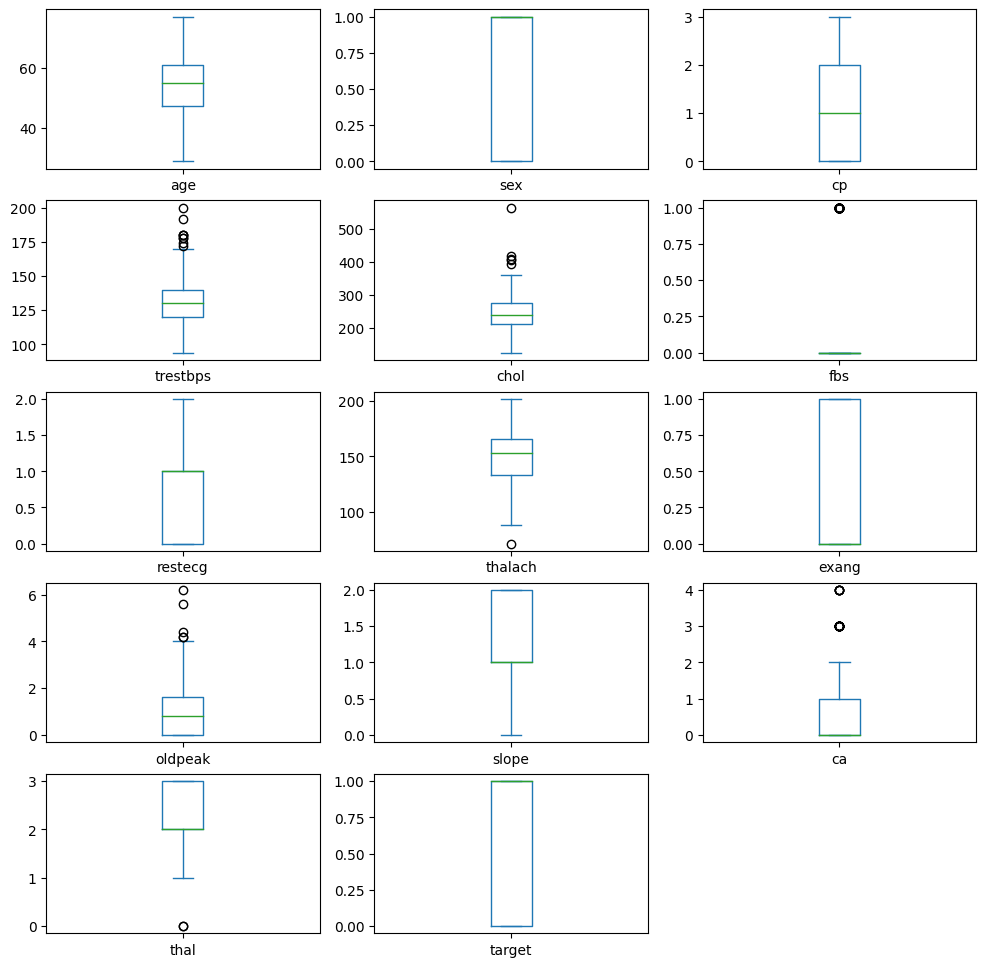

In [13]:
# box and whisker plot
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

In [14]:
# exploring chest pain(cp)
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

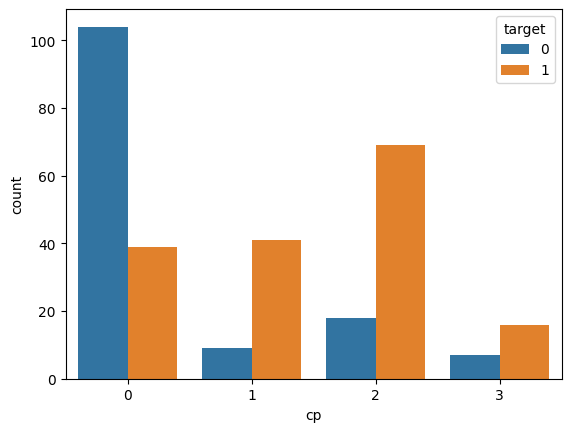

In [15]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='target')
plt.show()

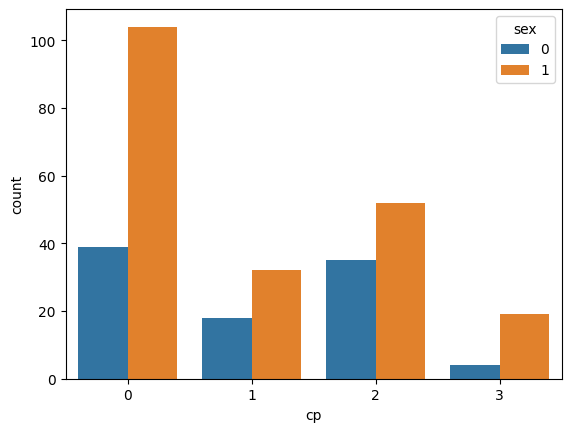

In [16]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='sex')
plt.show()

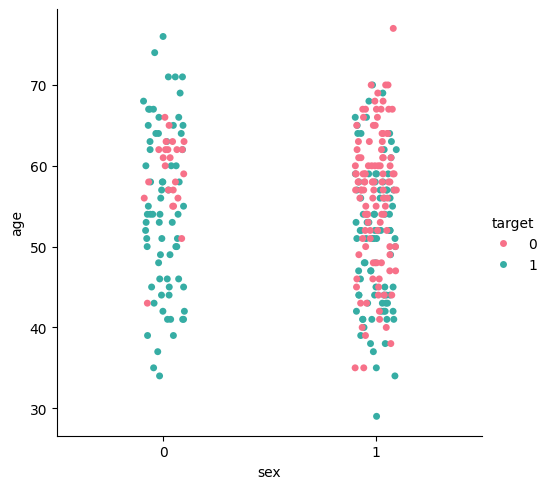

In [17]:
sns.catplot(data=df,x="sex", y="age",hue="target",palette="husl")
plt.show()

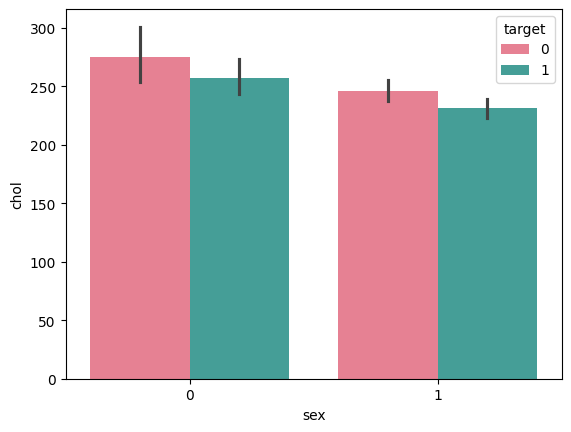

In [18]:
sns.barplot(data=df,x="sex", y="chol",hue="target",palette="husl")
plt.show()

In [19]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [20]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

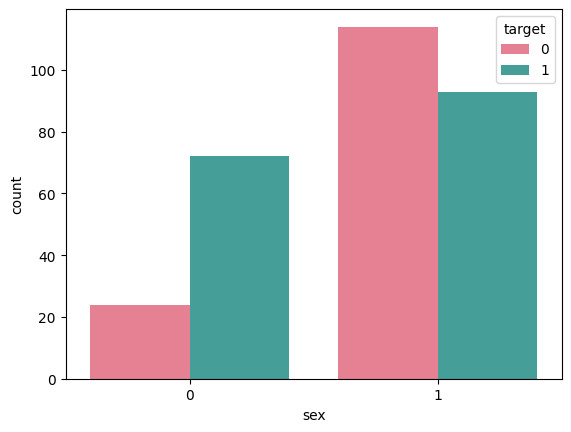

In [21]:
sns.countplot(x="sex",data=df,palette="husl",hue="target")
plt.show()

In [22]:
df["thal"].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

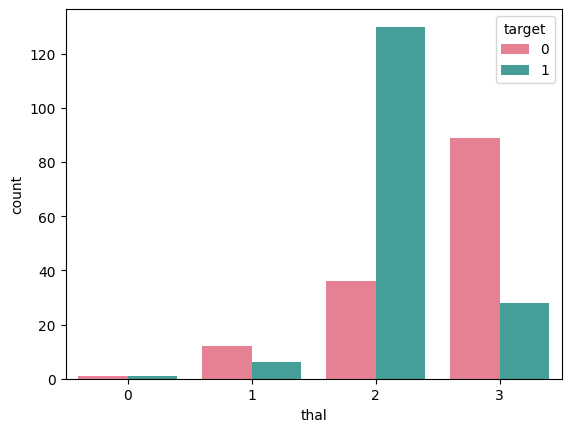

In [23]:
sns.countplot(x="thal",data=df,palette="husl",hue="target")
plt.show()

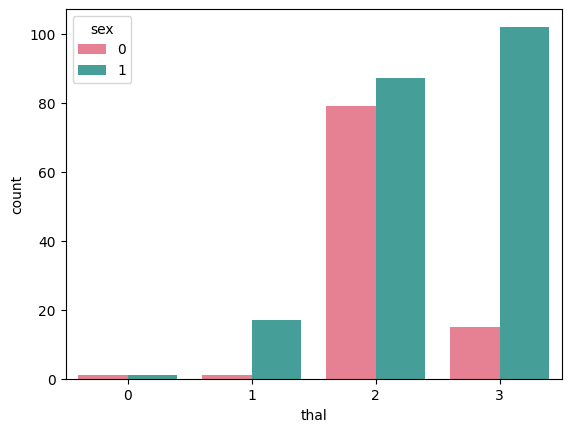

In [24]:
sns.countplot(x="thal",data=df,palette="husl",hue="sex")
plt.show()

In [25]:
df["slope"].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

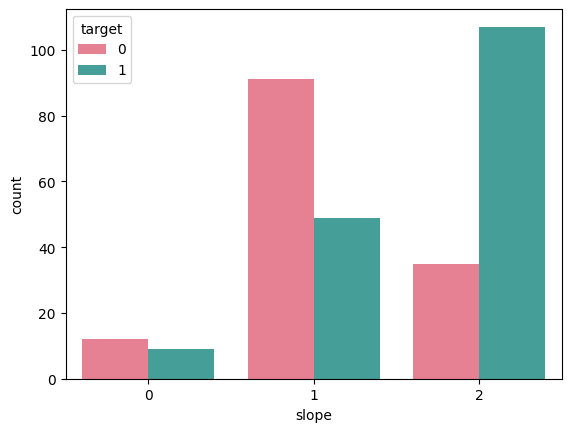

In [26]:
sns.countplot(x="slope",data=df,palette="husl",hue="target")
plt.show()

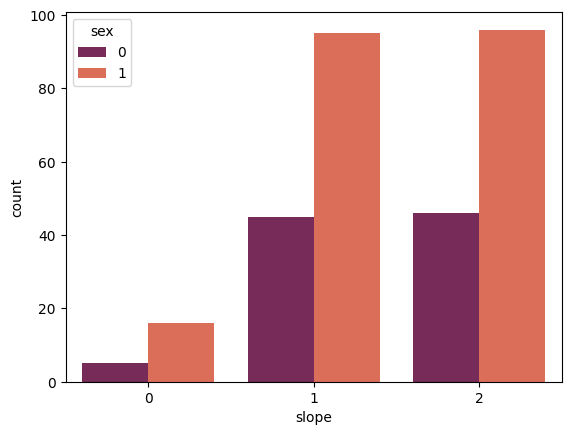

In [27]:
sns.countplot(x="slope",data=df,palette="rocket",hue="sex")
plt.show()

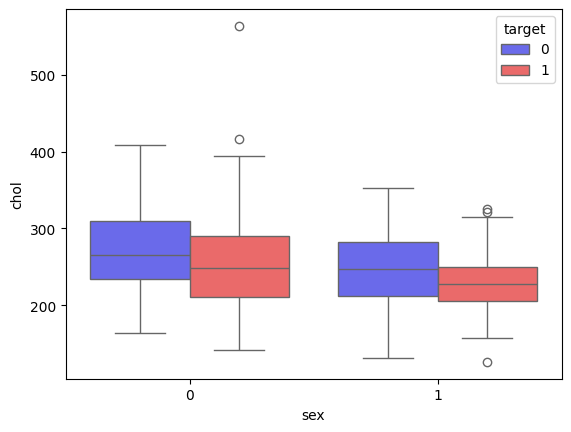

In [28]:
sns.boxplot(x="sex",y="chol",hue="target", palette="seismic",data=df)
plt.show()

In [29]:
gender=pd.crosstab(df["sex"],df["target"])
print(gender)

target    0   1
sex            
0        24  72
1       114  93


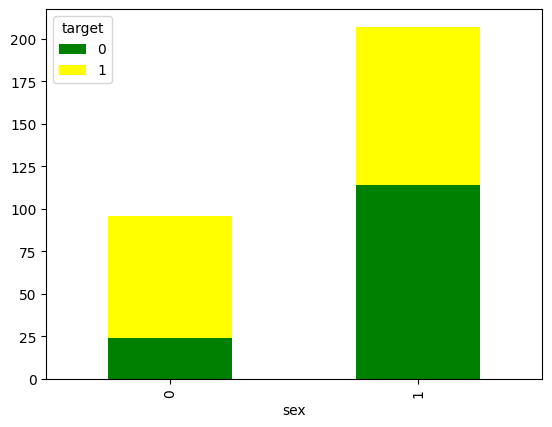

In [30]:
gender.plot(kind="bar", stacked=True,color=["green","yellow"],grid=False)
plt.show()

In [31]:
thal=pd.crosstab(index=df["sex"]
                 ,columns=[df["thal"]]
                 ,margins=True)
print(thal)

thal  0   1    2    3  All
sex                       
0     1   1   79   15   96
1     1  17   87  102  207
All   2  18  166  117  303


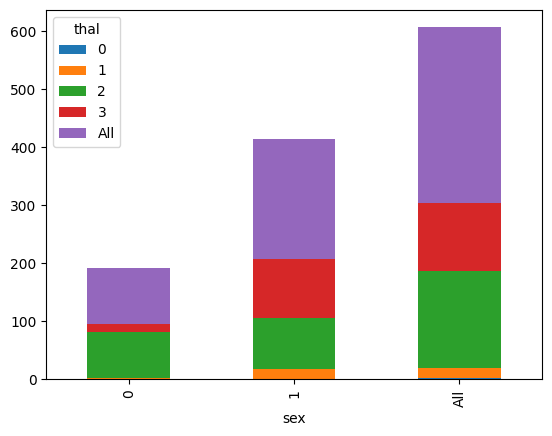

In [32]:
thal.plot(kind="bar",stacked=True)
plt.show()

In [33]:
thal_2=pd.crosstab(df["thal"],df["target"])
print(thal_2)

target   0    1
thal           
0        1    1
1       12    6
2       36  130
3       89   28


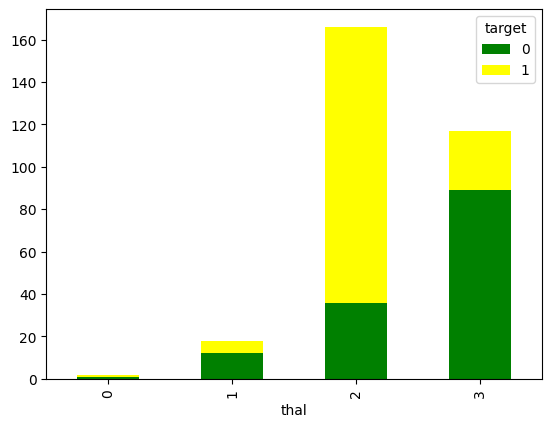

In [34]:
thal_2.plot(kind="bar", stacked=True,color=["green","yellow"],grid=False)
plt.show()

In [35]:
#Splitting features and target
x=df.drop("target",axis=1)
y=df["target"]

In [36]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [37]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [38]:
#Splitting the Data into Training data & Test Data
xtrain,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
print(x.shape, xtrain.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


In [40]:
## Model Training



In [41]:
# logistic regression

In [42]:
model = LogisticRegression()

In [43]:
# training the LogisticRegression model with Training data
model.fit(xtrain, y_train)

LogisticRegression()

In [44]:
x_train_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [45]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8305785123966942


In [46]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [47]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9016393442622951


In [48]:
## building predictive model
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1,)

# changing data frame into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [49]:
# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display the features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients
})

print(feature_importance.sort_values(by='Coefficient', ascending=False))

     Feature  Coefficient
2         cp     0.832071
10     slope     0.617893
6    restecg     0.576042
7    thalach     0.026236
0        age     0.011502
4       chol    -0.003191
3   trestbps    -0.013810
5        fbs    -0.116363
9    oldpeak    -0.407143
11        ca    -0.621969
8      exang    -0.712264
12      thal    -0.718205
1        sex    -1.419286


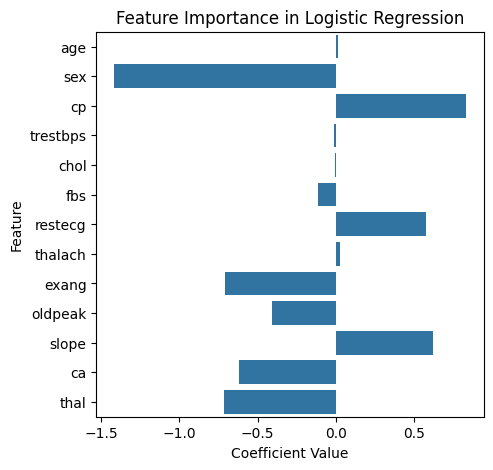

In [50]:
# Plot the feature importance
plt.figure(figsize=(5, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [51]:
# saving trained model

In [52]:
import pickle

In [53]:
filename='trained_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [54]:
# loading the saved model
loaded_model=pickle.load(open('trained_model.pkl','rb'))

In [55]:
input_data=(63,1,3,145,233,1,0,150,0,2.3,0,0,1,)

# changing data frame into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction =loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
